In [35]:
import gmplot
import io
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import peakutils 
from peakutils.plot import plot as pplot
import scipy
from math import sqrt
from scipy.integrate import quad
from numpy import trapz
from scipy.integrate import simps
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
#import plotly.plotly as py
#import plotly.graph_objs as go

import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot
#import chart_studio.graph_objs as go
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

The data is collected through the OBD with the help of an app called Torque. The dataset is imported in the form of a csv file.

In [36]:
data = pd.read_csv('videofinal.csv')          #Target Variable
data.head()

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),...,Trip average MPG(mpg),Trip Distance(km),Trip Time(Since journey start)(s),Trip time(whilst moving)(s),Trip time(whilst stationary)(s),Turbo Boost & Vacuum Gauge(psi),Turbo Pressure Control(psi),Voltage (Control Module)(V),Voltage (OBD Adapter)(V),Volumetric Efficiency (Calculated)(%)
0,Thu Jan 02 16:23:20 GMT+05:30 2020,23:19.7,78.535650,17.341071,0.0,4.288,438.527954,0.0,2.067417,6.272081,...,-,-,0,0.0,0.0,-,-,-,-,-
1,Thu Jan 02 16:23:21 GMT+05:30 2020,23:20.7,78.535650,17.341071,0.0,4.288,438.541382,0.0,1.351169,6.351132,...,-,-,0,0.0,0.0,-9.86256599,-,-,-,-
2,Thu Jan 02 16:23:22 GMT+05:30 2020,23:21.7,78.535649,17.341070,0.0,4.288,438.653809,0.0,1.421836,6.535584,...,-,-,0,0.0,0.0,-9.86256599,-,-,-,-
3,Thu Jan 02 16:23:23 GMT+05:30 2020,23:22.7,78.535649,17.341070,0.0,4.288,438.642822,0.0,0.959509,7.069776,...,-,-,0,0.0,0.0,-9.86256599,-,14.18200016,-,-
4,Thu Jan 02 16:23:24 GMT+05:30 2020,23:23.7,78.535649,17.341070,0.0,4.288,438.828308,0.0,4.199393,4.734184,...,-,-,0,0.0,0.0,-9.86256599,-,14.18200016,14.19999981,-


Plot1 : This function is to plot peaks in a graph, thres: This parameter decides the portion of the graph to be considered. min_dist= The distance between two consecutive points that are selected in the graph.
        
Plot2: This function is to just plot a simple graph with x-axis and y-axis data. All the data and titles of the axes can be passed as a parameter to the function.
    
mean_rolling: This function's main purpose is to reduce data points without losing the actual data. Mean is taken every two values and stored in the first value. The number of samples to be considered can be changed accordingly.

In [37]:
time = data['GPS Time']
Accx = data['Accx']
Accy = data['Accy']
Accz = data['Accz']
Lat = data['Latitude']
Longi = data['Longitude']


def Plot1(x,y,a,b):

    plt.plot(x,y,'b')
    indexes = peakutils.indexes(y, thres=0.9, min_dist=10)
    print(indexes)
    print(x[indexes], y[indexes])
    plt.figure()
    pplot(x,y,indexes)
    plt.title('Peaks')
    plt.xlabel(a)
    plt.ylabel(b)
    
def Plot2(x_list,y_list,x_label,y_label,plot_title):
    plt.plot(x_list,y_list)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    
def mean_rolling(List_name):
    chunks = [List_name[i:i+2] for i in range(0,len(List_name),2)]
    d = []
    for i in chunks:
        s = 0 
        for j in i:
            s += j/2
        d.append(s)
    print(d)
    return 

Plot: This function allows us to plot tri-axial data on a 2D plot. In this case, the data produced by the accelerometer (X Y Z axis) can be plotted in a single plot by passing the parameters to this function.

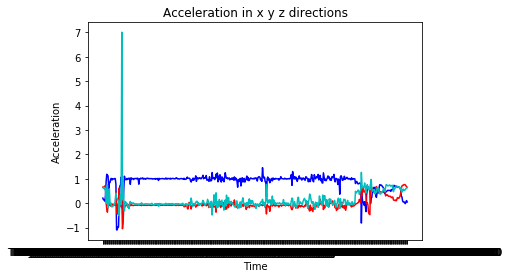

In [38]:
def Plot(x_direction,y_direction,z_direction,Time_parameter,x_label,y_label,plot_title):
  
    plt.figure()
    plt.plot(Time_parameter,x_direction,'b')
    plt.plot(Time_parameter,y_direction,'r')
    plt.plot(Time_parameter,z_direction,'c')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    
Plot(Accx,Accy,Accz,time,'Time','Acceleration','Acceleration in x y z directions')

gmplot is the function used to plot all the coordinates on the map. (12.9716,77.5946) is the latitude and longitude of Bengaluru which needs to be specified in order to get a precise look at the map. The color and the marker size can be changed accordingly by changing the parameter 'black' and edge_width.

In [39]:
gmap = gmplot.GoogleMapPlotter(12.9716,77.5946, 13)
gmap.plot(Lat, Longi,  
           'black', edge_width = 2.5) 
gmap.draw("map.html")

# Pothole detection

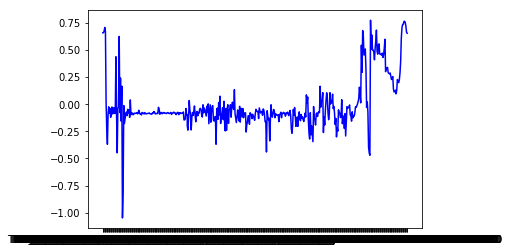

In [40]:
plt.plot(time,Accy,'b')

We need to select points that are the lowest with certain intervals. In this case, thres is set at 0.9 and the min_dist between 2 points is selected at 10. The parameter (-y) iss et so because we need the negatuve peaks in the graph. In order to obtain positive peaks the parameter should be fed as (y).

[30]
['Thu Jan 02 16:23:50 GMT+05:30 2020'] [-1.04749072]


Text(0,0.5,'Acceleration in the y direction')

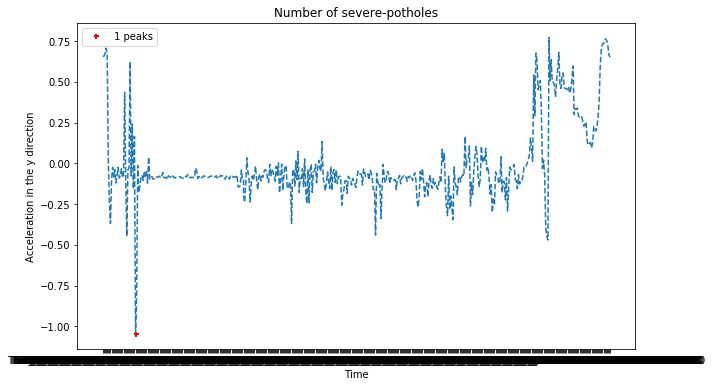

In [41]:
x = np.array(time)
y = np.array(Accy)
indexes = peakutils.indexes(-y, thres=0.9, min_dist=10)
print(indexes)
print(x[indexes], y[indexes])
plt.figure(figsize=(10,6))
pplot(x, y, indexes)
plt.title('Number of severe-potholes')
plt.xlabel('Time')
plt.ylabel('Acceleration in the y direction')

According to the graph, most of the selected points lie below -0.1. We select latitude longitude form the data with this threshold to map the coordinates.

In [42]:
c=data.Accy<-0.1
data[c]


,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),...,Trip average MPG(mpg),Trip Distance(km),Trip Time(Since journey start)(s),Trip time(whilst moving)(s),Trip time(whilst stationary)(s),Turbo Boost & Vacuum Gauge(psi),Turbo Pressure Control(psi),Voltage (Control Module)(V),Voltage (OBD Adapter)(V),Volumetric Efficiency (Calculated)(%)
6,Thu Jan 02 16:23:26 GMT+05:30 2020,23:25.7,78.535646,17.341072,0.30,4.288000,438.445435,136.0,7.908792,-1.072456,...,-,-,0,0.000000,0.000000,-9.86256599,-,14.18200016,14.19999981,-
7,Thu Jan 02 16:23:27 GMT+05:30 2020,23:26.7,78.535649,17.341072,0.28,4.288000,437.904236,308.3,5.764838,0.470232,...,-,-,0,0.000000,0.000000,-9.86256599,-,14.18200016,14.19999981,-
12,Thu Jan 02 16:23:32 GMT+05:30 2020,23:31.7,78.535671,17.341113,0.64,5.360000,432.510620,27.2,9.470644,-0.992207,...,-,-,0,0.000000,0.000000,-7.8320384,-,14.1590004,14.19999981,-
21,Thu Jan 02 16:23:41 GMT+05:30 2020,23:40.7,78.535692,17.341074,0.00,4.288000,432.656799,0.0,-9.641682,-1.252117,...,37.49416733,-,0,0.000000,0.000000,-9.86256599,-,14.20600033,14.19999981,-
22,Thu Jan 02 16:23:42 GMT+05:30 2020,23:41.7,78.535699,17.341076,0.00,4.288000,432.028442,0.0,-10.780731,-3.588906,...,37.49416733,-,0,0.000000,0.000000,-9.86256599,-,14.20600033,14.19999981,-
28,Thu Jan 02 16:23:48 GMT+05:30 2020,23:47.7,78.535687,17.341077,0.00,4.288000,432.450195,0.0,9.556881,-0.829315,...,36.00915909,-,0,0.000000,0.000000,-8.12211418,-,14.06499958,14.19999981,-
30,Thu Jan 02 16:23:50 GMT+05:30 2020,23:49.7,78.535684,17.341075,0.00,4.288000,432.772949,0.0,-3.881753,-6.437130,...,35.71099854,-,0,0.000000,0.000000,-8.12211418,-,14.13500023,14.19999981,-
31,Thu Jan 02 16:23:51 GMT+05:30 2020,23:50.7,78.535683,17.341074,0.00,4.288000,432.912109,0.0,-1.552151,-8.088812,...,35.58018875,-,0,0.000000,0.000000,-9.86256599,-,14.22900009,14.19999981,-
33,Thu Jan 02 16:23:53 GMT+05:30 2020,23:52.7,78.535681,17.341073,0.00,4.288000,433.137939,0.0,10.837265,-1.746783,...,35.34659958,-,0,0.000000,0.000000,-9.86256599,-,14.20600033,14.19999981,-
34,Thu Jan 02 16:23:54 GMT+05:30 2020,23:53.7,78.535680,17.341073,0.00,4.288000,433.124390,0.0,9.600000,-0.836501,...,35.14268494,-,0,0.000000,0.000000,-9.86256599,-,14.22900009,14.30000019,-


In [43]:
lati = [13.027313,13.026308,13.025118,13.023361,13.028859,13.033193,13.036492 ]
long = [77.577713,77.580344,77.581661,77.584423,77.586206,77.588136,77.589162 ]
gmap = gmplot.GoogleMapPlotter(12.9716,77.5946, 13)
gmap.scatter(lati, long,  
           'yellow',size = 10, marker = False) 
gmap.draw("Potholes.html")

The above part of the code creates a html page where the points where the accelerometer readings are lower than threshold is marked.

# Detection of speed breakers

[  3   9  17  25  32  42  48  55  64  71  78  85  93  99 108 114 127 133
 141 147 154 162 169 180 186 196 202 210 218 226 240 246 252 258 265 273
 281 287 294 301 312 323 333 339 348 354 366 378 387 398 410 419 426 432
 440 451 462]
['Thu Jan 02 16:23:23 GMT+05:30 2020' 'Thu Jan 02 16:23:29 GMT+05:30 2020'
 'Thu Jan 02 16:23:37 GMT+05:30 2020' 'Thu Jan 02 16:23:45 GMT+05:30 2020'
 'Thu Jan 02 16:23:52 GMT+05:30 2020' 'Thu Jan 02 16:24:02 GMT+05:30 2020'
 'Thu Jan 02 16:24:08 GMT+05:30 2020' 'Thu Jan 02 16:24:15 GMT+05:30 2020'
 'Thu Jan 02 16:24:24 GMT+05:30 2020' 'Thu Jan 02 16:24:31 GMT+05:30 2020'
 'Thu Jan 02 16:24:38 GMT+05:30 2020' 'Thu Jan 02 16:24:45 GMT+05:30 2020'
 'Thu Jan 02 16:24:53 GMT+05:30 2020' 'Thu Jan 02 16:24:59 GMT+05:30 2020'
 'Thu Jan 02 16:25:08 GMT+05:30 2020' 'Thu Jan 02 16:25:14 GMT+05:30 2020'
 'Thu Jan 02 16:25:27 GMT+05:30 2020' 'Thu Jan 02 16:25:32 GMT+05:30 2020'
 'Thu Jan 02 16:25:40 GMT+05:30 2020' 'Thu Jan 02 16:25:46 GMT+05:30 2020'
 'Thu Jan 02 16:2

Text(0,0.5,'Acceleration in the y direction')

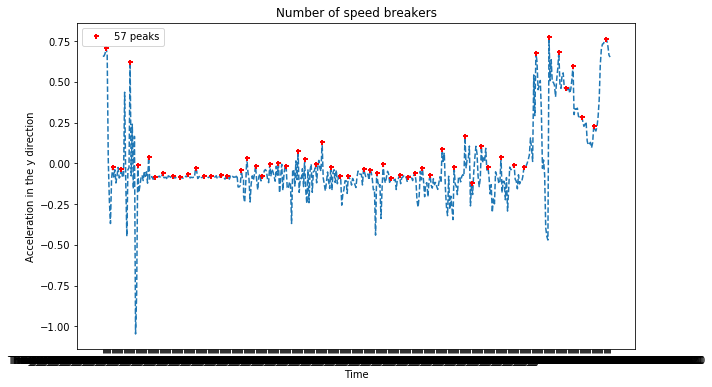

In [44]:
x = np.array(time)
y = np.array(Accy)
indexes = peakutils.indexes(y, thres=0.35, min_dist=5)
print(indexes)
print(x[indexes], y[indexes])
plt.figure(figsize=(10,6))
pplot(x, y, indexes)
plt.title('Number of speed breakers')
plt.xlabel('Time')
plt.ylabel('Acceleration in the y direction')

In [45]:
c=data.Accy>0.14
data[c]

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),...,Trip average MPG(mpg),Trip Distance(km),Trip Time(Since journey start)(s),Trip time(whilst moving)(s),Trip time(whilst stationary)(s),Turbo Boost & Vacuum Gauge(psi),Turbo Pressure Control(psi),Voltage (Control Module)(V),Voltage (OBD Adapter)(V),Volumetric Efficiency (Calculated)(%)
0,Thu Jan 02 16:23:20 GMT+05:30 2020,23:19.7,78.535650,17.341071,0.00,4.288000,438.527954,0.0,2.067417,6.272081,...,-,-,0,0.000000,0.000000,-,-,-,-,-
1,Thu Jan 02 16:23:21 GMT+05:30 2020,23:20.7,78.535650,17.341071,0.00,4.288000,438.541382,0.0,1.351169,6.351132,...,-,-,0,0.000000,0.000000,-9.86256599,-,-,-,-
2,Thu Jan 02 16:23:22 GMT+05:30 2020,23:21.7,78.535649,17.341070,0.00,4.288000,438.653809,0.0,1.421836,6.535584,...,-,-,0,0.000000,0.000000,-9.86256599,-,-,-,-
3,Thu Jan 02 16:23:23 GMT+05:30 2020,23:22.7,78.535649,17.341070,0.00,4.288000,438.642822,0.0,0.959509,7.069776,...,-,-,0,0.000000,0.000000,-9.86256599,-,14.18200016,-,-
4,Thu Jan 02 16:23:24 GMT+05:30 2020,23:23.7,78.535649,17.341070,0.00,4.288000,438.828308,0.0,4.199393,4.734184,...,-,-,0,0.000000,0.000000,-9.86256599,-,14.18200016,14.19999981,-
20,Thu Jan 02 16:23:40 GMT+05:30 2020,23:39.7,78.535697,17.341076,0.00,5.360000,431.597290,0.0,5.867844,5.457618,...,38.55793381,-,0,0.000000,0.000000,-9.86256599,-,14.1590004,14.30000019,-
25,Thu Jan 02 16:23:45 GMT+05:30 2020,23:44.7,78.535691,17.341075,0.00,4.288000,431.988403,0.0,-8.297818,5.578590,...,36.59171295,-,0,0.000000,0.000000,-8.26715088,-,13.3579998,13.39999962,-
27,Thu Jan 02 16:23:47 GMT+05:30 2020,23:46.7,78.535691,17.341078,0.00,4.288000,432.038574,0.0,6.885922,2.130299,...,36.18144989,-,0,0.000000,0.000000,-7.97707605,-,14.04100037,14.19999981,-
29,Thu Jan 02 16:23:49 GMT+05:30 2020,23:48.7,78.535685,17.341076,0.00,4.288000,432.516296,0.0,-0.692174,4.536557,...,35.8532753,-,0,0.000000,0.000000,-8.12211418,-,14.1590004,14.19999981,-
333,Thu Jan 02 16:28:52 GMT+05:30 2020,28:52.7,78.531152,17.342440,3.63,3.216000,418.929871,359.8,9.203548,0.525328,...,31.23411179,0.67731744,207,190.324997,17.629999,-9.7175293,-,14.18200016,14.10000038,-


In [46]:
lati = [13.027806,13.027016,13.025226,13.031858,13.034230,13.036789,13.039624  ]
long = [77.574728,77.579485,77.585040,77.587497,77.588328,77.589188,77.589422]
gmap = gmplot.GoogleMapPlotter(12.9716,77.5946, 13)
gmap.scatter(lati, long,  
           'yellow',size = 40, marker = False) 
gmap.draw("Speed_Breakers.html")

Similar to potholes, speed-breakers are detected with postive peaks in the same graph. The html file created shows the coordinated which match to values above threshold.